## Data Visualization
### Big Data Tools 
#### M.Sc. in Applied Analytics (coterminal course)
Fac. de Ingeniería -  Universidad de la Sabana<br>
Prof.: Hugo Franco, Ph.D.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Simultaneous Intra- and inter-group visualization/comparison

Comparing the electronic manufacturing performance between industrial hubs. Differences between the values between the variables describing each instance of the unit of analysis can be observed using Group Charts (the relevant issue is the question to answer)

In [3]:

# Define the new data focused on technology products
tech_hubs = ['Shenzhen', 'Suzhou', 'Beijing-Bohai']
electronic_products = ['Semiconductors', 'Consumer Electronics', 'Display Panels', 'EV Batteries', 'Solar Cells']

# Production data in billion USD equivalent
tech_production_data = {
    'Semiconductors': [42, 38, 25],        # Values for each hub
    'Consumer Electronics': [85, 45, 30],   # Smartphones, laptops, etc.
    'Display Panels': [28, 35, 18],
    'EV Batteries': [22, 18, 15],
    'Solar Cells': [15, 20, 12]
}

# Create DataFrame
df_tech = pd.DataFrame(tech_production_data, index=tech_hubs)
print("Technology Production Data (Billion USD):")
print(df_tech)

Technology Production Data (Billion USD):
               Semiconductors  Consumer Electronics  Display Panels  \
Shenzhen                   42                    85              28   
Suzhou                     38                    45              35   
Beijing-Bohai              25                    30              18   

               EV Batteries  Solar Cells  
Shenzhen                 22           15  
Suzhou                   18           20  
Beijing-Bohai            15           12  


In [4]:
# Convert to long format for Seaborn
tech_list = []
for hub in tech_hubs:
    for product in electronic_products:
        tech_list.append({
            'Tech Hub': hub,
            'Product': product,
            'Production': tech_production_data[product][tech_hubs.index(hub)]
        })

df_tech_long = pd.DataFrame(tech_list)
print("\nTechnology Production Data (Long Format):")
print(df_tech_long.head())


Technology Production Data (Long Format):
   Tech Hub               Product  Production
0  Shenzhen        Semiconductors          42
1  Shenzhen  Consumer Electronics          85
2  Shenzhen        Display Panels          28
3  Shenzhen          EV Batteries          22
4  Shenzhen           Solar Cells          15


#### Grouped bar chart

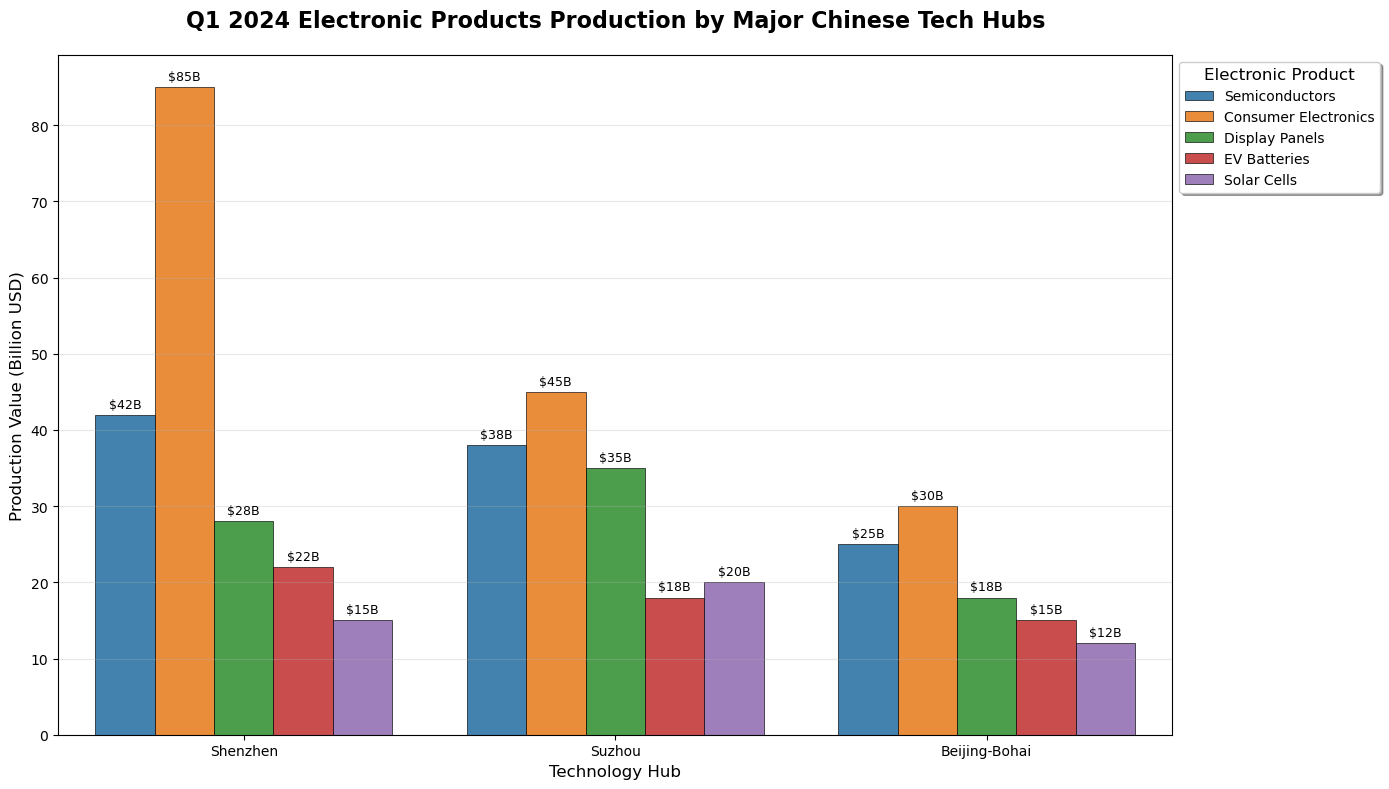

In [5]:
# Create the grouped bar plot with technology-focused colors
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_tech_long, x='Tech Hub', y='Production', hue='Product', 
                 palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], 
                 alpha=0.9, edgecolor='black', linewidth=0.5, saturation=0.8)

# Customize the plot for technology theme
plt.title('Q1 2024 Electronic Products Production by Major Chinese Tech Hubs', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Production Value (Billion USD)', fontsize=12)
plt.xlabel('Technology Hub', fontsize=12)
plt.xticks(rotation=0, ha='center')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='$%.0fB', padding=3, fontsize=9)

# Move legend to a better position
plt.legend(title='Electronic Product', title_fontsize=12, fontsize=10, frameon=True, 
           fancybox=True, shadow=True, loc='upper left', bbox_to_anchor=(1, 1))

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.savefig('grouped.png')
plt.show()


#### Proportion comparisons

Pie charts (sectors) present in a summarized fashion the share of each proportion Chinese tech hub in the overall electronic devices production

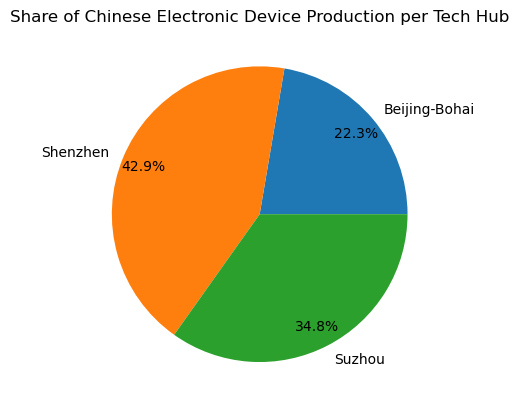

In [6]:
production_per_hub=df_tech_long.groupby('Tech Hub')['Production'].sum()
plt.pie(production_per_hub,
     
    labels=production_per_hub.index, # Use the hub names as labels on the wedges
    autopct='%1.1f%%',               # Format percentages on the wedges
    startangle=0,                  # Aesthetically rotate the start
    pctdistance=0.85                 # Move percentage text slightly inside the wedge
)
#plt.legend(title='Tech Hub',title_fontsize=12, fontsize=10, frameon=True, fancybox=True, shadow=True, loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Share of Chinese Electronic Device Production per Tech Hub")
plt.show()

### Visualizing proportions within cumulative values 
Example: Major trade partners of the U.S. Plot presenting both the overall size of the trade activity by country and the distribution of product types exported by each trade partner to the U.S. A stack bar chart shows the proportions internal to each instance of the unit of analysis, while the total bar height presents the cumulative share of the instance overall

In [7]:
# Create the import data (values in billions of USD)
US_trade_partners = ['China', 'Mexico', 'Canada', 'Germany', 'Japan']
import_categories = ['Machinery & Electrical', 'Vehicles', 'Mineral Fuels', 'Pharmaceuticals', 'Plastics']

# Import data in Billions of USD
import_data = {
    'China': [180, 15, 5, 8, 22],        # Values for each import category
    'Mexico': [75, 95, 18, 4, 12],
    'Canada': [45, 60, 85, 6, 10],
    'Germany': [55, 70, 10, 25, 15],
    'Japan': [65, 50, 8, 12, 18]
}

df_imports = pd.DataFrame(import_data, index=import_categories).T # Transpose to have partners as index
print("\nUS Imports by Partner and Category (Billions USD):")
print(df_imports)


US Imports by Partner and Category (Billions USD):
         Machinery & Electrical  Vehicles  Mineral Fuels  Pharmaceuticals  \
China                       180        15              5                8   
Mexico                       75        95             18                4   
Canada                       45        60             85                6   
Germany                      55        70             10               25   
Japan                        65        50              8               12   

         Plastics  
China          22  
Mexico         12  
Canada         10  
Germany        15  
Japan          18  


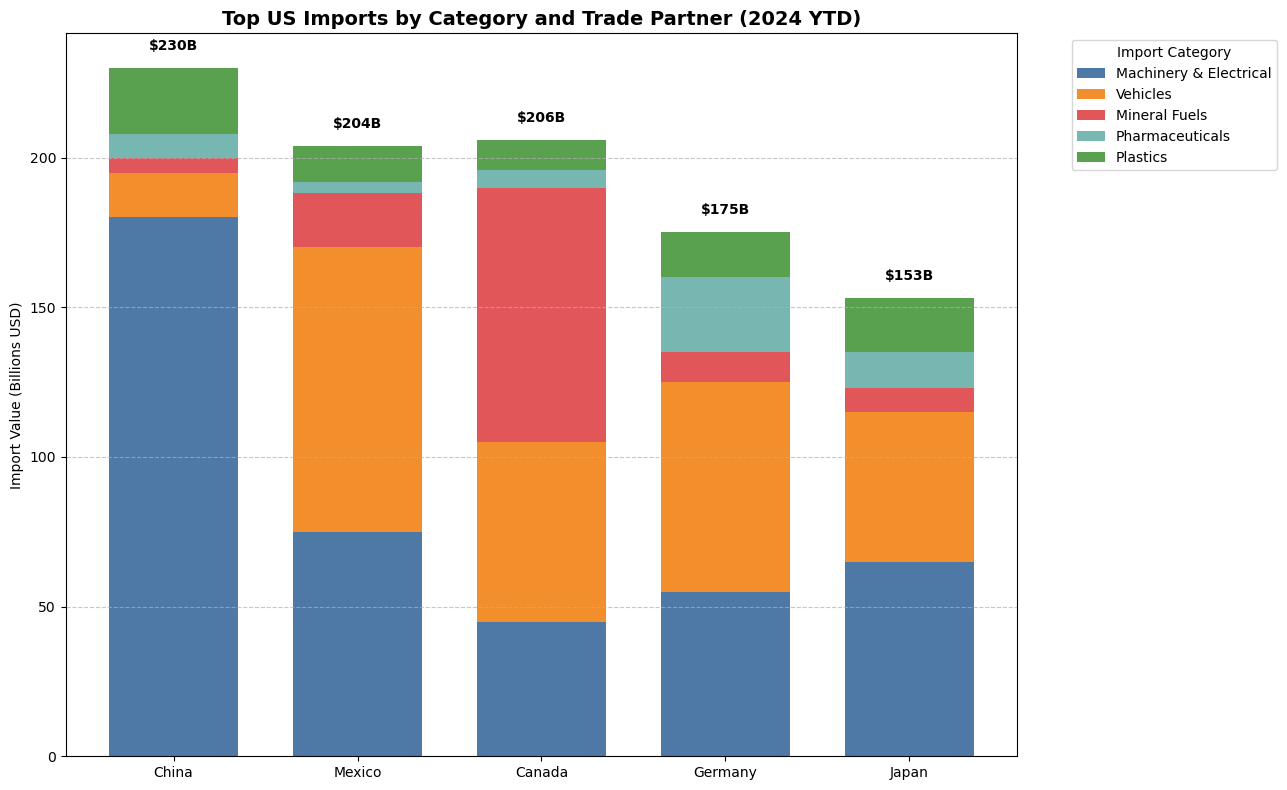

In [8]:
# Plotting
fig, ax = plt.subplots(figsize=(13, 8))

# Define a color palette for the import categories
import_colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f'] # A palette

# Create the stacked bars. The 'bottom' parameter is key.
bottom_values = np.zeros(len(US_trade_partners)) # Start with zero for the first stack

for i, category in enumerate(import_categories):
    ax.bar(US_trade_partners, df_imports[category], bottom=bottom_values,
           label=category, color=import_colors[i], width=0.7)
    bottom_values += df_imports[category].values # Update the bottom for the next stack

# Customize the chart
ax.set_ylabel('Import Value (Billions USD)')
ax.set_title('Top US Imports by Category and Trade Partner (2024 YTD)', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Import Category') # Place legend outside

# Add total value labels on top of the stacked bars
totals = df_imports.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 5, f'${total:,.0f}B', ha='center', va='bottom', fontweight='bold')

# Clean up the look
ax.yaxis.grid(True, linestyle='--', alpha=0.7) # Keep only horizontal gridlines for readability

plt.tight_layout()
plt.savefig('stacked.png')
plt.show()


### Exploring potential relationships between variables 
Assess the profitability of Research and Development (R&D) investment in a set of companies. Each company is a record in the dataset, which contains two columns, the amount destined to fund inhouse R&D activities and the profit obtained by such investment. Overall, is enterprise-funded R&D profitable?

Generated Data (first 5 rows):
   rnd_spend  profit_margin
0   5.745071       4.345634
1   4.792604       2.969740
2   5.971533       3.503151
3   7.284545       5.710858
4   4.648770       4.285138

--- Correlation Result ---
The Pearson correlation coefficient between 'rnd_spend' and 'profit_margin' is: 0.7781

--- Interpretation ---
This indicates a strong positive linear relationship.
In this context, a positive correlation suggests that as R&D investment increases, the profit margin tends to increase as well.


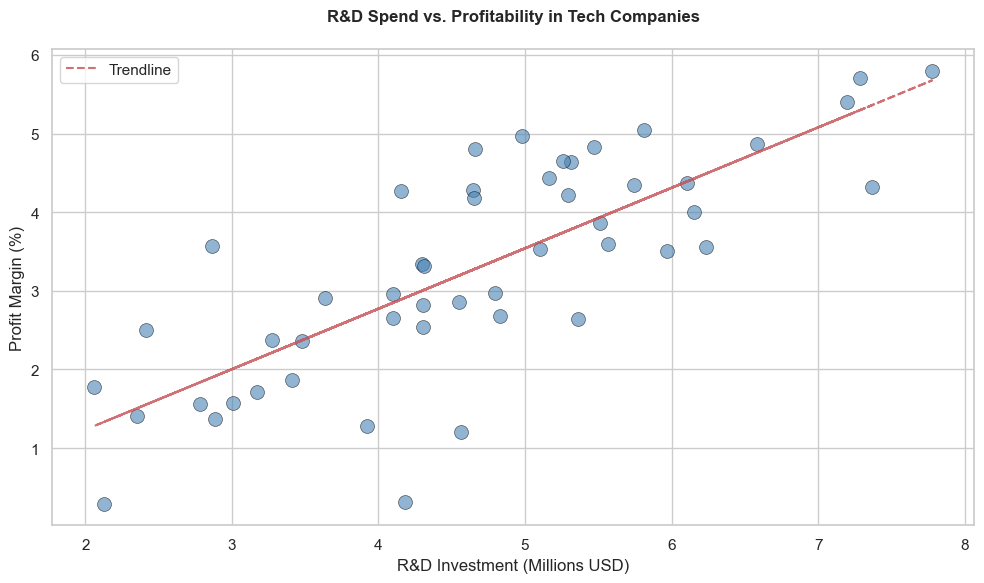

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Set plot style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. Create a pandas DataFrame from the synthetic data
df_rnd_profit= pd.read_csv('rnd_profit_data.csv')

# Display the first 5 rows of the DataFrame
print("Generated Data (first 5 rows):")
print(df_rnd_profit.head())

# Create the scatter plot
plt.scatter(df_rnd_profit['rnd_spend'], df_rnd_profit['profit_margin'], 
            alpha=0.6,  # Makes points slightly transparent to see density
            c='steelblue', 
            edgecolors='black', 
            linewidth=0.5, 
            s=100)  # Size of points

# Add labels and title
plt.xlabel('R&D Investment (Millions USD)')
plt.ylabel('Profit Margin (%)')
plt.title('R&D Spend vs. Profitability in Tech Companies', fontweight='bold', pad=20)

rnd_investment = df_rnd_profit['rnd_spend']
profit = df_rnd_profit['profit_margin']
correlation_coefficient = rnd_investment.corr(profit, method='pearson')


# --- Step 3: Display and Interpret the Result ---
print("\n--- Correlation Result ---")
print(f"The Pearson correlation coefficient between 'rnd_spend' and 'profit_margin' is: {correlation_coefficient:.4f}")

print("\n--- Interpretation ---")
# Provide a qualitative interpretation based on the coefficient's value
if correlation_coefficient > 0.7:
    interpretation = "This indicates a strong positive linear relationship."
elif correlation_coefficient > 0.4:
    interpretation = "This indicates a moderate positive linear relationship."
elif correlation_coefficient > 0:
    interpretation = "This indicates a weak positive linear relationship."
elif correlation_coefficient < -0.7:
    interpretation = "This indicates a strong negative linear relationship."
elif correlation_coefficient < -0.4:
    interpretation = "This indicates a moderate negative linear relationship."
elif correlation_coefficient < 0:
    interpretation = "This indicates a weak negative linear relationship."
else:
    interpretation = "This indicates little to no linear relationship."

print(interpretation)
print("In this context, a positive correlation suggests that as R&D investment increases, the profit margin tends to increase as well.")


# Calculate the correlation coefficient
# The default method for .corr() is 'pearson', so specifying it is optional but good for clarity.
correlation_coefficient = rnd_investment.corr(profit, method='pearson')

# Add a trendline to make the relationship clear
z = np.polyfit(df_rnd_profit['rnd_spend'], df_rnd_profit['profit_margin'], 1)
p = np.poly1d(z)
plt.plot(df_rnd_profit['rnd_spend'], p(df_rnd_profit['rnd_spend']), "r--", alpha=0.8, linewidth=1.5, label='Trendline')

# Add annotation for insight
plt.annotate('Strong Positive Correlation:\nHigher R&D spend associated\nwith higher profitability', 
             xy=(7, 8), xytext=(8, 2),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontweight='bold')

plt.legend()
plt.tight_layout()
plt.savefig('scatter.png')
plt.show()

### Comparison of the distribution of a quantitative variable between groups  
Angioplasia incidence - difference between biological sexes. the Boxplot allows the comparison between the data distribution of different groups within the same dataset, and the detection (visualization) of outliers

Age statistical description:
         count       mean       std        min        25%        50%  \
Sex                                                                   
Female   40.0  56.299131  7.619811  38.000000  51.964688  56.261536   
Male     55.0  50.462654  9.029754  38.201649  45.092684  48.337641   

              75%        max  
Sex                           
Female  60.654078  72.905935  
Male    53.720484  77.000000  


<Figure size 1000x600 with 0 Axes>

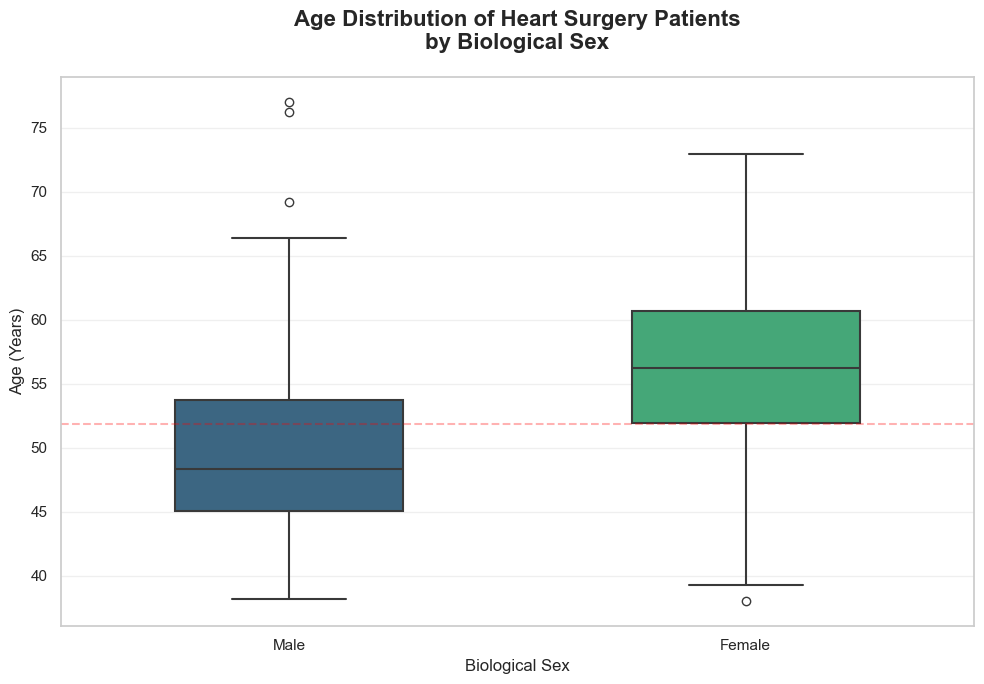

In [11]:
# Set style for a clean medical-style visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

df_heart = pd.read_csv('heart_surgery_patients_age.csv')

print('Age statistical description:\n', df_heart.groupby('Sex')['Age'].describe())

# Create the box plot
plt.figure(figsize=(10, 7))
ax = sns.boxplot(data=df_heart, x='Sex', y='Age', palette='viridis', hue="Sex", 
                 width=0.5, linewidth=1.5, fliersize=6)

# Refinements: Add swarm plot to show individual data points (optional but informative)
# # sns.swarmplot(data=df, x='Sex', y='Age', color='black', alpha=0.5, size=3, ax=ax)

# Customize the plot for medical context
plt.title('Age Distribution of Heart Surgery Patients\nby Biological Sex', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Age (Years)', fontsize=12)
plt.xlabel('Biological Sex', fontsize=12)

plt.axhline(y=df_heart['Age'].median(), color='red', linestyle='--', alpha=0.3, label='Overall Median')

# Add grid and clean up
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig("boxplot.png")
plt.show()


### Some Python features to prepare the next session
__1. Lambda functions:__ 
Python implementation of anonymous functions, commonly executed to operate over an entire column or set of rows or columns of a tabular structure, homogeneously

In [12]:
# Load the dataset
df = pd.read_csv('employees.csv')
print("Original Dataset:")
print(df)
print("\n" + "="*50 + "\n")

# EXAMPLE 1: using apply() to a single column - WITHOUT axis=1
# Simple transformation: Convert the employee performance score to a letter grade
df['grade'] = df['performance_score'].apply(
    lambda score: 'A' if score >= 90 else 'B' if score >= 80 else 'C'
)

print("1. apply() WITHOUT axis=1 - Single Column Transformation:")
print(df[['name', 'performance_score', 'grade']])
print("\n" + "="*50 + "\n")

# EXAMPLE 2: apply() to entire rows - WITH axis=1 meaning rows, a value of 0 specifies columns
# Complex calculation using multiple columns
df['bonus'] = df.apply(
    lambda row: row['salary'] * 0.10 if row['performance_score'] >= 95 else
               row['salary'] * 0.07 if row['performance_score'] >= 90 else
               row['salary'] * 0.05,
    axis=1
)

print("2. apply() WITH axis=1 - Multiple Column Calculation:")
print(df[['name', 'salary', 'performance_score', 'bonus']])
print("\n" + "="*50 + "\n")

Original Dataset:
   employee_id            name   department  salary  years_of_service  \
0          101      Alice Chen  Engineering   85000                 3   
1          102       Bob Smith    Marketing   72000                 5   
2          103   Carlos Garcia        Sales   68000                 2   
3          104       Diana Kim  Engineering   92000                 7   
4          105     Ethan Jones    Marketing   78000                 4   
5          106    Fatima Ahmed  Engineering  110000                10   
6          107   George Miller        Sales   75000                 6   
7          108   Hannah Wilson           HR   65000                 3   
8          109    Ian Thompson  Engineering   95000                 8   
9          110  Jennifer Lopez    Marketing   81000                 5   

   performance_score  
0                 92  
1                 88  
2                 95  
3                 86  
4                 91  
5                 89  
6                

__2. Decorators:__ Add extra functionality to Python functions without altering their original coding

_Example_: Log the function execution time. Without decorators...

In [13]:
import time

def calculate_sum(a, b):
    start_time = time.time()  # Timing code
    print(f"Starting calculate_sum with {a} and {b}")  # Logging code
    
    # Actual function logic
    result = a + b
    time.sleep(1)  # Simulate some processing time
    
    end_time = time.time()
    print(f"Finished calculate_sum in {end_time - start_time:.2f} seconds")  # More logging
    return result

def calculate_product(a, b):
    start_time = time.time()  # Repeated timing code
    print(f"Starting calculate_product with {a} and {b}")  # Repeated logging code
    
    # Actual function logic  
    result = a * b
    time.sleep(2)  # Simulate some processing time
    
    end_time = time.time()
    print(f"Finished calculate_product in {end_time - start_time:.2f} seconds")  # Repeated logging
    return result

# Test the functions
print(calculate_sum(5, 3))
print(calculate_product(5, 3))

Starting calculate_sum with 5 and 3
Finished calculate_sum in 1.00 seconds
8
Starting calculate_product with 5 and 3
Finished calculate_product in 2.00 seconds
15


With decorators...

In [14]:
import time

# Define the decorator
def log_execution(func):
    # args are arguments passed to the function as a tuple (positional, unknown number)
    # kwargs are arguments passed to the function as a dictonary (able to be unpacked with their names, unknown number)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        print(f"Starting {func.__name__} with arguments {args}")
        
        # Call the original function
        result = func(*args, **kwargs)
        
        end_time = time.time()
        print(f"Finished {func.__name__} in {end_time - start_time:.2f} seconds")
        return result
    return wrapper

# Apply the decorator to our functions
@log_execution
def calculate_sum(a, b):
    time.sleep(1)  # Simulate work
    return a + b

@log_execution  
def calculate_product(a, b):
    time.sleep(2)  # Simulate more work
    return a * b

@log_execution
def greet(name):
    time.sleep(0.5)
    return f"Hello, {name}!"

# Test the decorated functions
print(calculate_sum(5, 3))
print(calculate_product(5, 3))
print(greet("Alice"))

Starting calculate_sum with arguments (5, 3)
Finished calculate_sum in 1.00 seconds
8
Starting calculate_product with arguments (5, 3)
Finished calculate_product in 2.00 seconds
15
Starting greet with arguments ('Alice',)
Finished greet in 0.50 seconds
Hello, Alice!
